# Variants of SGD

### 1. **Improving the Learning Rate**

- **Fixed Learning Rate**: Used in SGD, Momentum, and NAG. Simple but requires careful tuning.
- **Adaptive Learning Rate**: Used in AdaGrad, RMSProp, AdaDelta, and Adam. Automatically adjusts the learning rate based on gradient statistics, making it more robust to hyperparameter choices.

### 2. **Improving the Descent Direction**

- **Gradient Only**: Used in SGD. Relies solely on the current gradient, which can be inefficient.
- **Momentum-Based**: Used in Momentum and NAG. Incorporates past gradients to smooth the descent path.
- **Adaptive Scaling**: Used in AdaGrad, RMSProp, AdaDelta, and Adam. Scales the gradient by past gradient statistics to navigate complex loss landscapes more effectively.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

## # **Stochastic Gradient Descent (SGD)**

### Formula:

$$
\theta_{t+1} = \theta_t - \eta \nabla L(\theta_t)
$$

where:

- $\theta_t$: Parameters at step $t$.
- $\eta$: Learning rate.
- $\nabla L(\theta_t)$: Gradient of the loss function $L$ with respect to $\theta_t$.

### Explanation:

- **Learning Rate**: The learning rate $\eta$ is fixed throughout the optimization process. This can lead to slow convergence or oscillations if $\eta$ is too large or too small.
- **Descent Direction**: The descent direction is simply the negative gradient $-\nabla L(\theta_t)$. This direction is optimal locally but may not be efficient for navigating complex loss landscapes.

In [2]:
def sgd(initial_params, x, y, lr, num_steps):
    params = np.array(initial_params)
    history = [params.copy()]
    for _ in range(num_steps):
        grad = grad_mse(*params, x, y)
        params -= lr * grad
        history.append(params.copy())
    return np.array(history)

## # **Momentum**

### Formula:

$$
v_{t+1} = \gamma v_t + \eta \nabla L(\theta_t)
$$

$$
\theta_{t+1} = \theta_t - v_{t+1}
$$

where:

- $v_t$: Velocity (accumulated gradient) at step $t$.
- $\gamma$: Momentum coefficient (typically 0.9).

### Explanation:

- **Learning Rate**: The learning rate $\eta$ is still fixed, but the momentum term $\gamma v_t$ helps accelerate convergence by accumulating past gradients.
- **Descent Direction**: The descent direction is improved by incorporating past gradients. This helps smooth the optimization path and escape shallow local minima.

In [3]:
def momentum(initial_params, x, y, lr, num_steps, gamma=0.9):
    params = np.array(initial_params)
    velocity = np.zeros_like(params)
    history = [params.copy()]
    for _ in range(num_steps):
        grad = grad_mse(*params, x, y)
        velocity = gamma * velocity + lr * grad
        params -= velocity
        history.append(params.copy())
    return np.array(history)

## # **Nesterov Accelerated Gradient (NAG)**

### Formula:

$$
v_{t+1} = \gamma v_t + \eta \nabla L(\theta_t - \gamma v_t)
$$

$$
\theta_{t+1} = \theta_t - v_{t+1}
$$

### Explanation:

- **Learning Rate**: Similar to Momentum, the learning rate $\eta$ is fixed, but NAG uses a "lookahead" gradient to adjust the update direction.
- **Descent Direction**: The gradient is computed at $\theta_t - \gamma v_t$ (a future position), which provides a more accurate descent direction. This helps reduce oscillations and improves convergence.

In [4]:
def nesterov(initial_params, x, y, lr, num_steps, gamma=0.9):
    params = np.array(initial_params)
    velocity = np.zeros_like(params)
    history = [params.copy()]
    for _ in range(num_steps):
        params_ahead = params - gamma * velocity
        grad = grad_mse(*params_ahead, x, y)
        velocity = gamma * velocity + lr * grad
        params -= velocity
        history.append(params.copy())
    return np.array(history)

## # **AdaGrad**

### Formula:

$$
G_t = G_{t-1} + (\nabla L(\theta_t))^2
$$

$$
\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{G_t + \epsilon}} \nabla L(\theta_t)
$$

where:

- $G_t$: Accumulated squared gradients.
- $\epsilon$: Small constant for numerical stability.

### Explanation:

- **Learning Rate**: The learning rate is adapted per parameter based on the accumulated squared gradients. Parameters with large gradients get smaller updates, and vice versa.
- **Descent Direction**: The descent direction is scaled by the inverse square root of $G_t$, which helps in sparse data settings but can cause the learning rate to shrink too much over time.

In [5]:
def adagrad(initial_params, x, y, lr, num_steps, eps=1e-8):
    params = np.array(initial_params)
    cache = np.zeros_like(params)
    history = [params.copy()]
    for _ in range(num_steps):
        grad = grad_mse(*params, x, y)
        cache += grad**2
        params -= lr * grad / (np.sqrt(cache) + eps)
        history.append(params.copy())
    return np.array(history)

## # **RMSProp**

### Formula:

$$
G_t = \gamma G_{t-1} + (1 - \gamma) (\nabla L(\theta_t))^2
$$

$$
\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{G_t + \epsilon}} \nabla L(\theta_t)
$$
where:

- $\gamma$: Decay rate for the moving average (typically 0.9).

### Explanation:

- **Learning Rate**: Similar to AdaGrad, but the squared gradients are exponentially decaying. This prevents the learning rate from shrinking too much.
- **Descent Direction**: The descent direction is scaled by the moving average of squared gradients, which helps in non-stationary problems.

In [6]:
def rmsprop(initial_params, x, y, lr, num_steps, gamma=0.9, eps=1e-8):
    params = np.array(initial_params)
    cache = np.zeros_like(params)
    history = [params.copy()]
    for _ in range(num_steps):
        grad = grad_mse(*params, x, y)
        cache = gamma * cache + (1 - gamma) * grad**2
        params -= lr * grad / (np.sqrt(cache) + eps)
        history.append(params.copy())
    return np.array(history)

## # **AdaDelta**

### Formula:

$$
G_t = \gamma G_{t-1} + (1 - \gamma) (\nabla L(\theta_t))^2
$$

$$
\Delta \theta_t = \frac{\sqrt{\Delta \theta_{t-1} + \epsilon}}{\sqrt{G_t + \epsilon}} \nabla L(\theta_t)
$$

$$
\theta_{t+1} = \theta_t - \Delta \theta_t
$$
where:

- $\Delta \theta_t$: Update for $\theta_t$.

### Explanation:

- **Learning Rate**: AdaDelta eliminates the need for a learning rate \(\eta\) by using a ratio of past updates to the current gradient. This makes it more robust to hyperparameter tuning.
- **Descent Direction**: The descent direction is scaled by the ratio of past updates to the current gradient, which helps in adapting to the curvature of the loss surface.

In [7]:
def adadelta(initial_params, x, y, num_steps, gamma=0.999999, eps=1e-8):
    params = np.array(initial_params)
    cache = np.zeros_like(params)
    delta = np.zeros_like(params)
    history = [params.copy()]
    for _ in range(num_steps):
        grad = grad_mse(*params, x, y)
        cache = gamma * cache + (1 - gamma) * grad**2
        update = (np.sqrt(delta + eps) / (np.sqrt(cache + eps))) * grad
        params -= update
        delta = gamma * delta + (1 - gamma) * update**2
        history.append(params.copy())
    return np.array(history)

## # **Adam (Adaptive Moment Estimation)**

### Formula:

$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1) \nabla L(\theta_t)
$$

$$
v_t = \beta_2 v_{t-1} + (1 - \beta_2) (\nabla L(\theta_t))^2
$$

$$
\hat{m}_t = \frac{m_t}{1 - \beta_1^t}
$$

$$
\hat{v}_t = \frac{v_t}{1 - \beta_2^t}
$$

$$
\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t
$$
where:

- $m_t$: First moment (mean) of gradients.
- $v_t$: Second moment (uncentered variance) of gradients.
- $\beta_1, \beta_2$: Exponential decay rates (typically 0.9 and 0.999).

### Explanation:

- **Learning Rate**: The learning rate is adapted per parameter using the moving averages of the first and second moments of the gradients. This provides a dynamic and robust learning rate.
- **Descent Direction**: The descent direction is improved by using the bias-corrected first moment ($\hat{m}_t$) and scaled by the square root of the second moment ($\sqrt{\hat{v}_t}$). This combines the benefits of Momentum and RMSProp.

In [8]:
def adam(initial_params, x, y, lr, num_steps, beta1=0.9, beta2=0.999, eps=1e-8):
    params = np.array(initial_params)
    m = np.zeros_like(params)
    v = np.zeros_like(params)
    history = [params.copy()]
    for t in range(1, num_steps + 1):
        grad = grad_mse(*params, x, y)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad**2
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        params -= lr * m_hat / (np.sqrt(v_hat) + eps)
        history.append(params.copy())
    return np.array(history)

## # Case 1

Rgression fuction:

$$
y=sin(wx)+b
$$

Loss function: MSE

In [9]:
np.random.seed(42)
w_true = 2.0    # 真实权重
b_true = 3.0    # 真实偏置
num_samples = 100
initial_params = [0.0, 6.0]  # 初始点
lr = 0.1                     # 学习率（可能需要调整）
num_steps = 100              # 迭代次数
w_grid = np.linspace(-6, 6, 400)  # 调整范围以包含真实值
b_grid = np.linspace(-2, 8, 400)
W, B = np.meshgrid(w_grid, b_grid)

In [10]:
x = np.random.uniform(-2, 2, num_samples)
noise = np.random.normal(0, 0.5, num_samples)
y = np.sin(w_true * x) + b_true + noise

In [11]:
def mse_loss(w, b, x, y):
    y_pred = np.sin(w * x) + b
    return np.mean((y_pred - y) ** 2)

def grad_mse(w, b, x, y):
    y_pred = np.sin(w * x) + b
    error = y_pred - y
    grad_w = 2 * np.mean(error * np.cos(w * x) * x)
    grad_b = 2 * np.mean(error)
    return np.array([grad_w, grad_b])

In [12]:
algorithms = {
    "SGD": sgd(initial_params, x, y, lr, num_steps),
    "Momentum": momentum(initial_params, x, y, lr, num_steps),
    "NAG": nesterov(initial_params, x, y, lr, num_steps),
    "AdaGrad": adagrad(initial_params, x, y, lr, num_steps),
    "RMSProp": rmsprop(initial_params, x, y, lr, num_steps),
    "AdaDelta": adadelta(initial_params, x, y, num_steps),
    "Adam": adam(initial_params, x, y, lr, num_steps)
}

In [13]:
def vectorized_mse_loss(W, B, x, y):
    y_pred = np.sin(W[..., np.newaxis] * x) + B[..., np.newaxis]
    return np.mean((y_pred - y) ** 2, axis=2)

Z = vectorized_mse_loss(W, B, x, y)

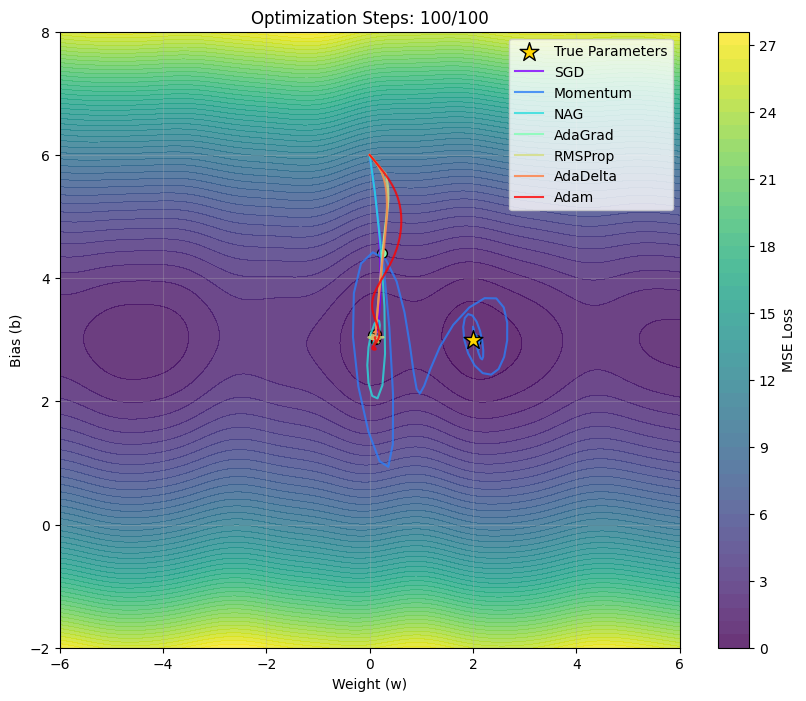

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))
contour = ax.contourf(W, B, Z, levels=50, cmap='viridis', alpha=0.8)
plt.colorbar(contour, label='MSE Loss')

global_optimum = np.array([w_true, b_true])
ax.scatter(global_optimum[0], global_optimum[1], c='gold', s=200, marker='*', edgecolor='black', 
           label='True Parameters', zorder=5)

colors = plt.cm.rainbow(np.linspace(0, 1, len(algorithms)))
lines = [ax.plot([], [], color=c, lw=1.5, alpha=0.8, label=algo)[0] for c, algo in zip(colors, algorithms.keys())]
dots = [ax.scatter([], [], color=c, s=50, edgecolor='black') for c in colors]

def update(frame):
    ax.set_title(f'Optimization Steps: {frame}/{num_steps}')
    for line, dot, (algo, path) in zip(lines, dots, algorithms.items()):
        line.set_data(path[:frame, 0], path[:frame, 1])
        dot.set_offsets(path[frame] if frame < len(path) else path[-1])
    return lines + dots

anim = FuncAnimation(fig, update, frames=num_steps+1, interval=50, blit=True, repeat=True)

ax.legend(loc='upper right')
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_xlim(w_grid.min(), w_grid.max())
ax.set_ylim(b_grid.min(), b_grid.max())
ax.grid(alpha=0.3)

HTML(anim.to_html5_video())

# anim.save('./assets/gds1.gif', writer='pillow', fps=15)

## # Case 2

Rgression fuction:

$$
y=wsin(wx)+b
$$

Loss function: MSE

In [15]:
# 生成数据
np.random.seed(42)
w_true = 2.0    # 真实权重
b_true = 3.0    # 真实偏置
num_samples = 100
initial_params = [3.9, 3.5]  # 初始点
lr = 0.1                     # 学习率
num_steps = 100              # 迭代次数
# 准备参数空间网格
w_grid = np.linspace(0, 6, 400)  # 调整范围以包含真实值
b_grid = np.linspace(0, 6, 400)
W, B = np.meshgrid(w_grid, b_grid)

In [16]:
# 生成数据
x = np.random.uniform(-2, 2, num_samples)
noise = np.random.normal(0, 0.5, num_samples)
y = w_true * np.sin(w_true * x) + b_true + noise  # 回归函数

In [17]:
# 义 MSE 损失函数
def mse_loss(w, b, x, y):
    y_pred = w * np.sin(w * x) + b
    return np.mean((y_pred - y) ** 2)

# 损失函数的梯度
def grad_mse(w, b, x, y):
    wx = w * x
    sin_wx = np.sin(wx)
    cos_wx = np.cos(wx)
    y_pred = w * sin_wx + b
    error = y_pred - y

    # 梯度计算
    grad_w = 2 * np.mean(error * (sin_wx + w * x * cos_wx))
    grad_b = 2 * np.mean(error)
    return np.array([grad_w, grad_b])

In [18]:
# 运行所有优化算法
algorithms = {
    "SGD": sgd(initial_params, x, y, lr, num_steps),
    "Momentum": momentum(initial_params, x, y, lr, num_steps),
    "NAG": nesterov(initial_params, x, y, lr, num_steps),
    "AdaGrad": adagrad(initial_params, x, y, lr, num_steps),
    "RMSProp": rmsprop(initial_params, x, y, lr, num_steps),
    "AdaDelta": adadelta(initial_params, x, y, num_steps),
    "Adam": adam(initial_params, x, y, lr, num_steps)
}

In [19]:
# 向量化计算 MSE 损失
def vectorized_mse_loss(W, B, x, y):
    wx = W[..., np.newaxis] * x
    sin_wx = np.sin(wx)
    y_pred = W[..., np.newaxis] * sin_wx + B[..., np.newaxis]
    return np.mean((y_pred - y) ** 2, axis=2)

Z = vectorized_mse_loss(W, B, x, y)

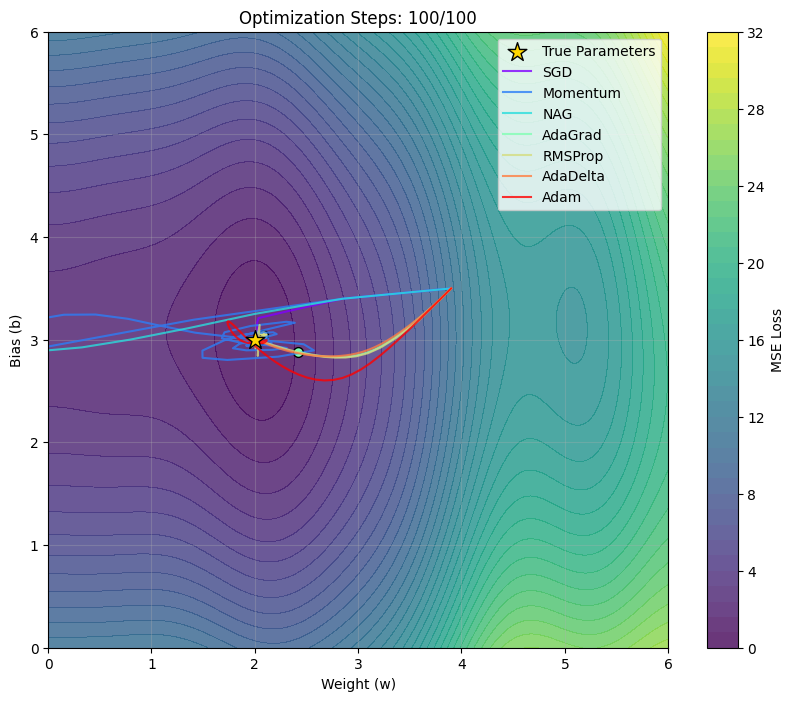

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
contour = ax.contourf(W, B, Z, levels=50, cmap='viridis', alpha=0.8)
plt.colorbar(contour, label='MSE Loss')

# 标记真实参数
global_optimum = np.array([w_true, b_true])
ax.scatter(global_optimum[0], global_optimum[1], c='gold', s=200, marker='*', edgecolor='black', 
           label='True Parameters', zorder=5)

# 初始化轨迹和点
colors = plt.cm.rainbow(np.linspace(0, 1, len(algorithms)))
lines = [ax.plot([], [], color=c, lw=1.5, alpha=0.8, label=algo)[0] for c, algo in zip(colors, algorithms.keys())]
dots = [ax.scatter([], [], color=c, s=50, edgecolor='black') for c in colors]

def update(frame):
    ax.set_title(f'Optimization Steps: {frame}/{num_steps}')
    for line, dot, (algo, path) in zip(lines, dots, algorithms.items()):
        line.set_data(path[:frame, 0], path[:frame, 1])
        dot.set_offsets(path[frame] if frame < len(path) else path[-1])
    return lines + dots

anim = FuncAnimation(fig, update, frames=num_steps+1, interval=50, blit=True, repeat=True)

# 添加图例和标注
ax.legend(loc='upper right')
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_xlim(w_grid.min(), w_grid.max())
ax.set_ylim(b_grid.min(), b_grid.max())
ax.grid(alpha=0.3)

# 在Jupyter中显示动画
HTML(anim.to_html5_video())

# 保存动画（需要pillow）
# anim.save('./assets/gds2.gif', writer='pillow', fps=15)